In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"C:\Users\user\Downloads\diabetes (1).csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Tasks:
# 1. Understand and explore the dataset.

#  Exploratory Data Analysis (EDA)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.shape

(768, 9)

In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

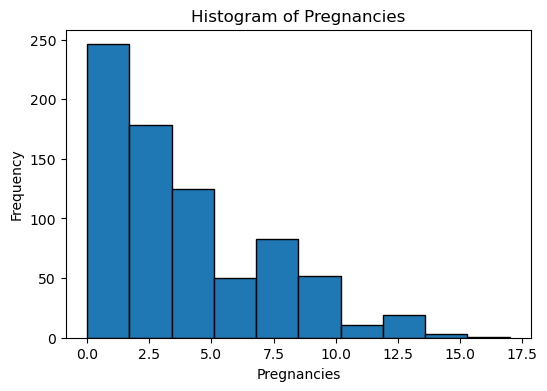

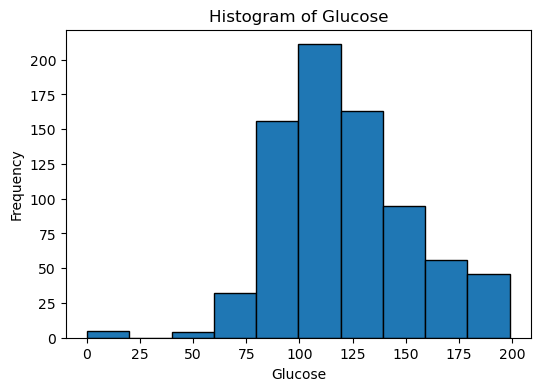

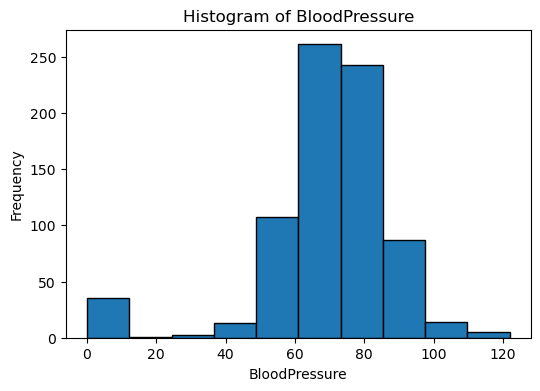

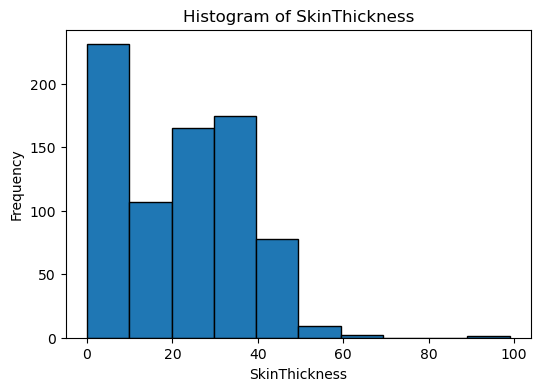

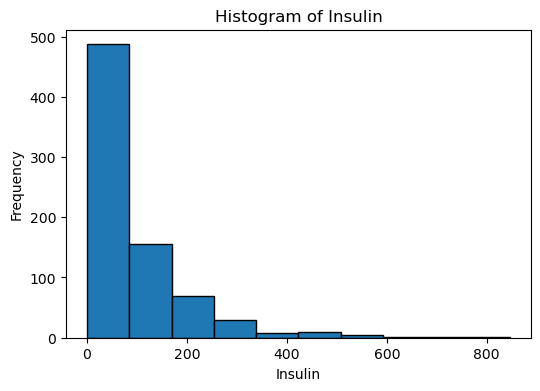

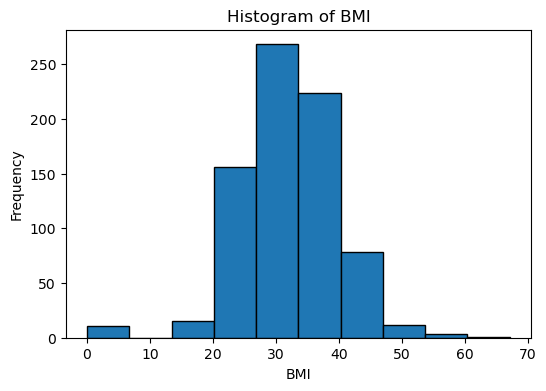

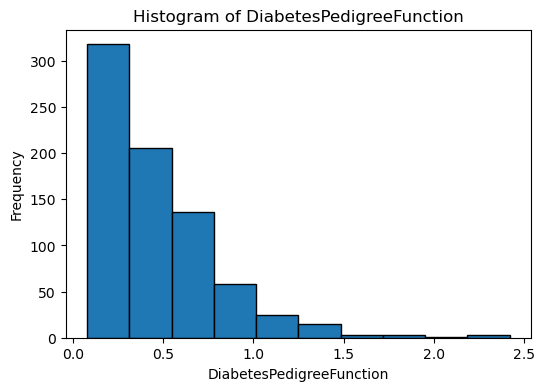

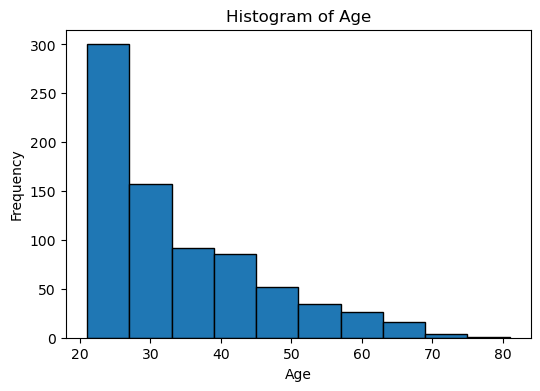

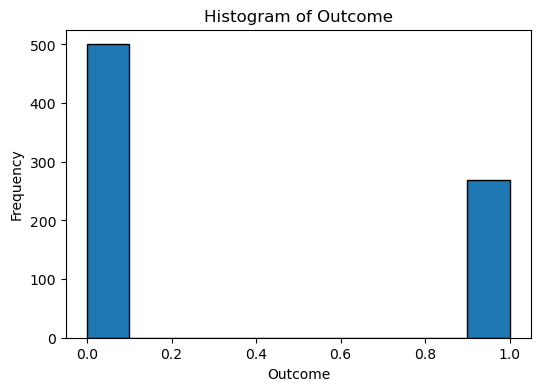

In [10]:
# Loop through all numeric columns
for column in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6,4))
    plt.hist(data[column], bins=10, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [11]:
data.select_dtypes("number").skew()#skewness

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [12]:
data.duplicated().sum()

0

In [13]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
data['Outcome'].value_counts(normalize=True)   

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Outcome value counts:
Outcome
0    500
1    268
Name: count, dtype: int64


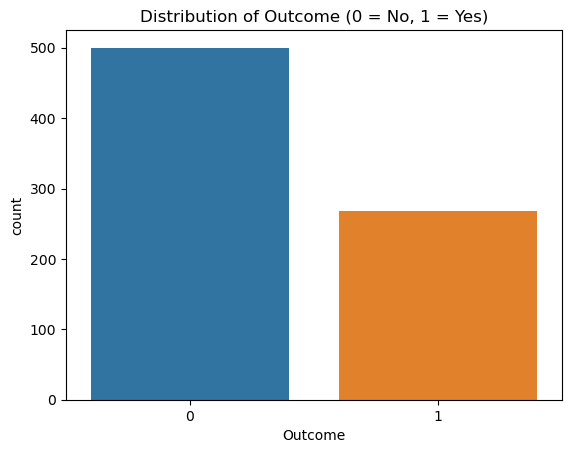

In [15]:
# Target distribution
print("Outcome value counts:")
print(data['Outcome'].value_counts())
sns.countplot(x='Outcome', data=data)
plt.title("Distribution of Outcome (0 = No, 1 = Yes)")
plt.show()

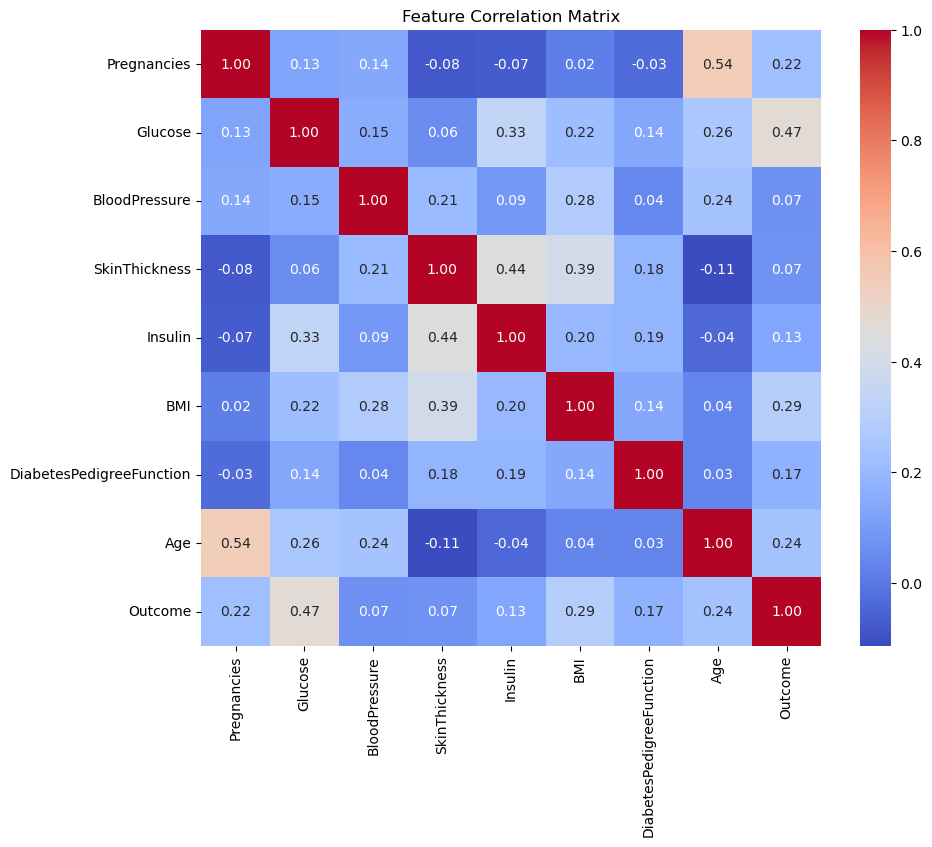

In [16]:
# Correlation
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# 2. Perform preprocessing (handle missing values, scaling, etc.).

In [17]:
# Find columns that have any zero values
cols_with_zeros = data.columns[(data == 0).any()]
print("Columns with any zero values:", list(cols_with_zeros))

Columns with any zero values: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']


In [18]:
# Identify zeros in columns that shouldn't be zero
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_counts = {col: (data[col] == 0).sum() for col in cols_with_zero_as_missing}
zero_counts

{'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11}

In [19]:
# Treat zeros in specific columns as missing (NaN)

# 4.1 Replace zeros with NaN for specified columns
df_clean = data.copy()
cols_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_missing:
    df_clean[col] = df_clean[col].replace(0, np.nan)
    

# show missing counts
df_clean.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
# Find columns that have any zero values
cols_with_zeros = df_clean.columns[(df_clean == 0).any()]
print("Columns with any zero values:", list(cols_with_zeros))

Columns with any zero values: ['Pregnancies', 'Outcome']


In [21]:
df_clean.select_dtypes('number').skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
Insulin                     2.166464
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [22]:
# Features where 0 is invalid
cols_with_zeros = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

imputer = SimpleImputer(strategy="median")
df_clean[cols_with_zeros] = imputer.fit_transform(df_clean[cols_with_zeros])

In [23]:
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [24]:
df_clean.shape

(768, 9)

In [25]:
# Check which columns still have zeros after imputation
cols_with_zeros = df_clean.columns[(df_clean == 0).any()]
print("Columns with any zero values after imputation:", list(cols_with_zeros))

Columns with any zero values after imputation: ['Pregnancies', 'Outcome']


In [26]:
df_clean.isna().sum()#missing values checking

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Outliers Handling

<Axes: >

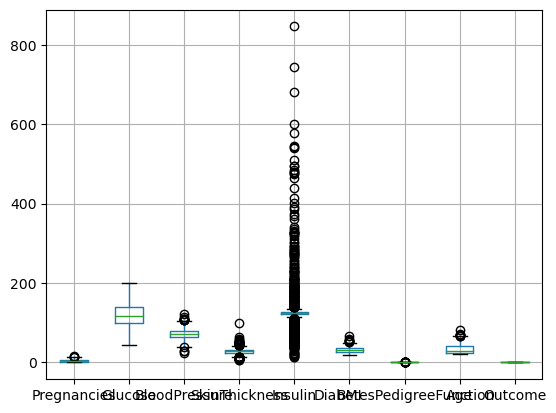

In [27]:
df_clean.boxplot()

In [28]:
numeric_cols=df_clean.select_dtypes("number").columns
numeric_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

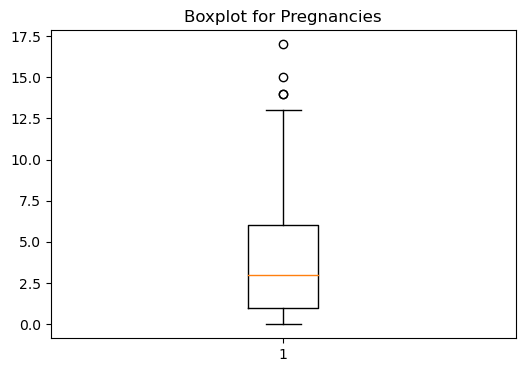

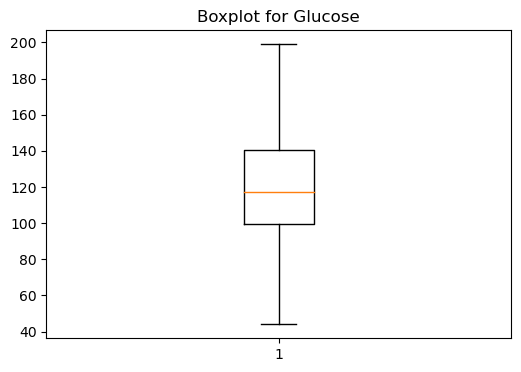

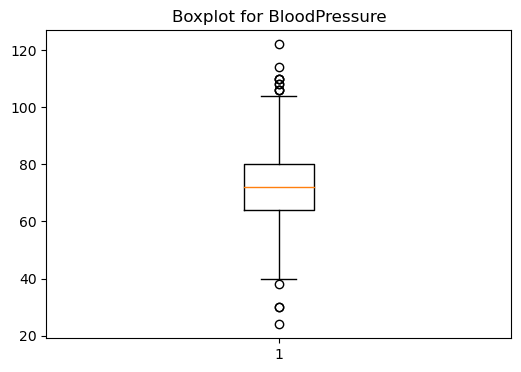

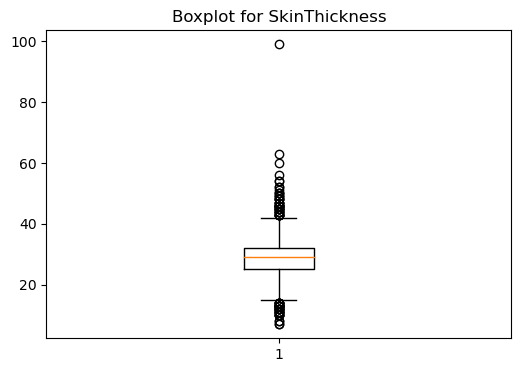

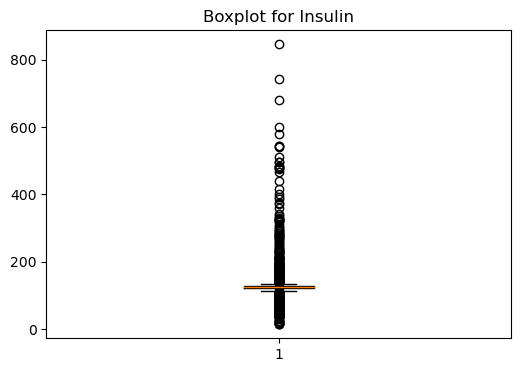

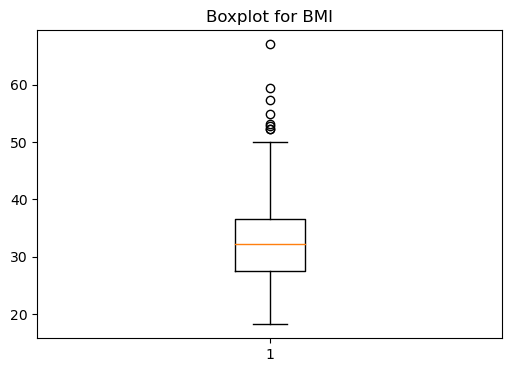

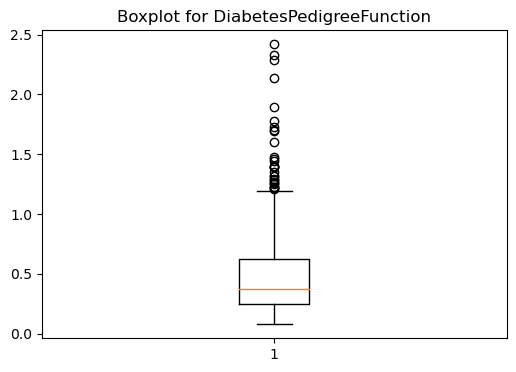

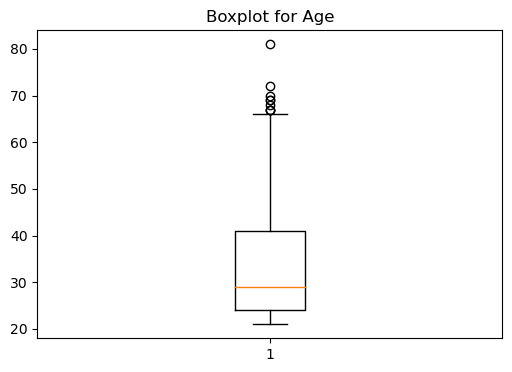

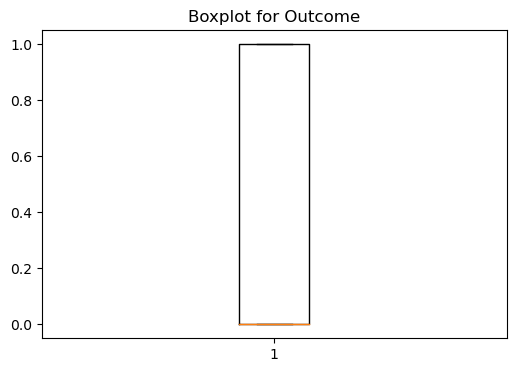

In [29]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df_clean[col])
    plt.title(f'Boxplot for {col}') 
    plt.show()

In [30]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Cap the outliers instead of removing (safer for small datasets)
        data[col] = np.where(data[col] < lower, lower,
                             np.where(data[col] > upper, upper, data[col]))
    return data

df_clean = remove_outliers_iqr(df_clean, df_clean.columns[:-1])  # apply to all features except target

In [31]:
#No encoding required as all features are numerical.

In [32]:
#Splitting target
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

In [33]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (614, 8) Test shape: (154, 8)


# 3. Apply different classification models.(Logistic Regression,kNN,SVM,Decision Tree etc) 

# a. Logistic Regression

In [35]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

# b. KNN

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# c. SVM

In [37]:
svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

# d. Decision Tree

In [38]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 4. Apply ensemble methods (Random Forest, Boosting, Bagging etc.). 

# a. Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# b. Bagging

In [40]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

# c. AdaBoost

In [41]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

# d. Gradient Boosting

In [42]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

# 5. Evaluate all models using metrics such as Accuracy, Precision, Recall, F1-score etc. 

In [43]:
models = {
    "Logistic Regression": log_reg,
    "KNN": knn,
    "SVM": svm,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Bagging": bagging,
    "AdaBoost": ada,
    "Gradient Boosting": gb
}

# Collect training and testing scores for each model
results = []
for name, model in models.items():
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred)
    train_rec = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Testing metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred)
    test_rec = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Train Precision": train_prec,
        "Train Recall": train_rec,
        "Train F1": train_f1,
        "Test Accuracy": test_acc,
        "Test Precision": test_prec,
        "Test Recall": test_rec,
        "Test F1": test_f1
    })

# Convert to DataFrame and sort by Test F1
results_df = pd.DataFrame(results).sort_values(by="Test F1", ascending=False)
print(results_df)


                 Model  Train Accuracy  Train Precision  Train Recall  \
6             AdaBoost        0.828990         0.791444      0.691589   
7    Gradient Boosting        0.920195         0.923077      0.841121   
4        Random Forest        1.000000         1.000000      1.000000   
1                  KNN        0.837134         0.806452      0.700935   
2                  SVM        0.828990         0.804469      0.672897   
5              Bagging        1.000000         1.000000      1.000000   
0  Logistic Regression        0.788274         0.741379      0.602804   
3        Decision Tree        1.000000         1.000000      1.000000   

   Train F1  Test Accuracy  Test Precision  Test Recall   Test F1  
6  0.738155       0.759740        0.666667     0.629630  0.647619  
7  0.880196       0.759740        0.680851     0.592593  0.633663  
4  1.000000       0.753247        0.673913     0.574074  0.620000  
1  0.750000       0.740260        0.640000     0.592593  0.615385  
2 

# 6.  Identify the best-performing model and provide justification. 

AdaBoost emerged as the best-performing model, achieving the highest test F1-score (0.648) with balanced Precision and Recall. It generalizes well compared to other ensemble models that overfit, making it the most suitable choice for predicting diabetes in this dataset.